# Mi tercer notebook

## Python 2 III

#### (Esta es la última versión de este tutorial y se recomienda utilizar el de Python 3.x)

> Carlos Antonio González Sánchez $\mathbb{C} \alpha \hat r \ell \dot o \sigma$
>
> Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

### Uso genérico de librerías (bibliotecas)

Las bibliotecas o librerías ayudan a importar distintos tipos de herramientas de otros programadores y se pueden especializar en gráficos, funciones matemáticas, imágenes, etc. Dichas herramientas serán útiles para todos los ejemplos que se utilizan en el presente notebook. Las librerías se importan de la siguiente manera:

```python
from nombre_de_la_libreria import *
```

En la línea anterior de código se especifica que de la librería ``` nombre_de_la_libreria``` se incorporen a todas las funciones que ahí se encuentren. Las librerías más usuales para el trabajo de cómputo científico son ```math```, ```numpy```, ```scipy``` y ```pylab```. Sin embargo debido a la gran cantidad de funciones que se encuentran en dichas librerías, éstas tienen submódulos especializados que no se incorporan por defecto. Tal es el caso de ```sicpy.integrate``` que contiene funciones especializadas en integración numérica. A continuación mostramos el llamado de algunas de las librerías más usuales.

> Nota: En este y subsecuentes notebook's se introducen varias maneras de hacer gráficas. Sin embargo, la manera correcta y eficiente de hacer las gráficas se presenta a partir de la mitad de este *Notebook*. Cómo se verá más adelante, esto permite tener un control específico sobre cada gráfica y se evitan ambiguedades.

In [1]:
from pylab import * # se importa la libreria pylab
from scipy.integrate import * # se importa la libreria scipy.integrate
%matplotlib inline 

Cabe mencionar que en **IPython Notebook** existen los *magic commands* que son "librerías" que funcionan en los notebooks como scripts para hacer la integración de varios ambientes o entornos de programación mucho más amigables. En el caso del comando:
```python
%matplotlib inline
```
Se utiliza para hacer que el despliegue gráfico de la librería ```matplotlib``` se haga dentro del mismo notebook en lugar de que se haga en una terminal gráfica externa.

Con la librerías podemos acceder a funciones prefabricadas y muy eficientes. Por ejemplo, podemos definir arreglos que funcionen como vectores y matrices. Como muestra de ello, la función ```linspace``` extiende la funcionalidad de lo que conocimos como ```range```. A continuación se muestra el uso de esta función y note la diferencia en el comportamiento de cada variable cuando se toma el cuadrado de cada uno de los productos generados.

In [2]:
x = linspace(0,2*pi,5) # linspace(inicio,final,numero de puntos)
print x*2 #imprime x^2
y = range(5) # range genera una lista de numeros de 0 a 4
print y*2 # imprime y^2

[ 0.          3.14159265  6.28318531  9.42477796 12.56637061]
[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


En el caso del ```linspace``` obtenemos un array, y este se comporta más parecido a lo que usualmente le pediríamos en cómputo científico al elevar al cuadrado una función.

> Note que el cuadrado de una lista produce que ésta se duplique, mientras que el cuadrado de un ```array``` que proviene de la función ```linspace``` se comporta como el cuadrado de cada una de las componentes.

### Graficando funciones

A continuación se muestra como graficar funciones de manera sencilla. Primero generamos el dominio donde estará definida la función. Posteriormente evaluamos una función utilizando el arreglo anterior, y finalmente utilizamos el comando ```plot``` para hacer la gráfica de la función.

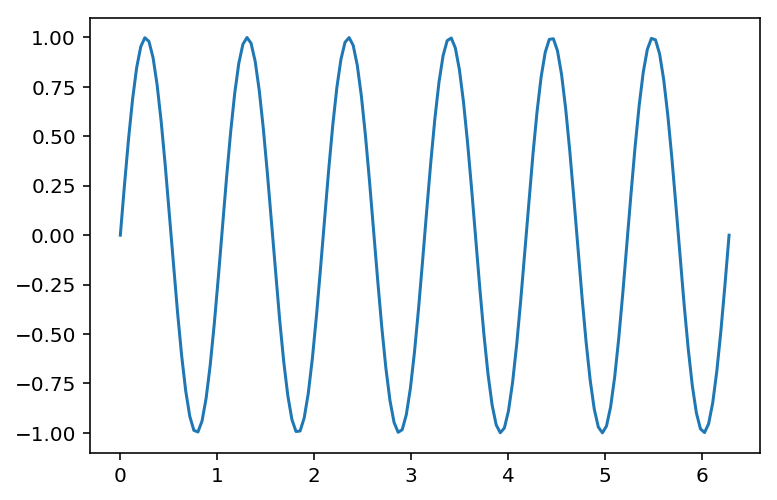

In [3]:
#Grafica de y=sen(6x)
x =linspace(0,2*pi,150) # define x con linspace(inicio,final,numero de puntos)
y=sin(6*x) # define la funcion y=sen(6x)
plot(x,y) # grafica x,y
show() # muestra el resultado grafico

> Note que ```x``` y ```y``` deben ser arreglos (listas o arrays) que tengan la misma longitud.

### Ecuaciones Diferenciales Ordinarias (EDO)

A continuación se presenta una comparación entre una función que podemos hacer contra una que está programada en la librería de ```scipy```. Primero veamos como programar el algoritmo de integración de *Euler*. 

Una EDO sencilla que podemos programar es $y'(x) = ay(x)$ con la condición inicial $ y(0)=1$. Es bien conocido que la solución a la ecuación anterior es:

$$y(x)=e^{ax}$$

En la siguiente celda se define la función solución con el objeto de graficarla y analizar su comportamiento.

> Nota: La constante **a** que aparece en este problema se le conoce como **constante de proporcionalidad**, la cual puede ser un parámetro de la EDO.

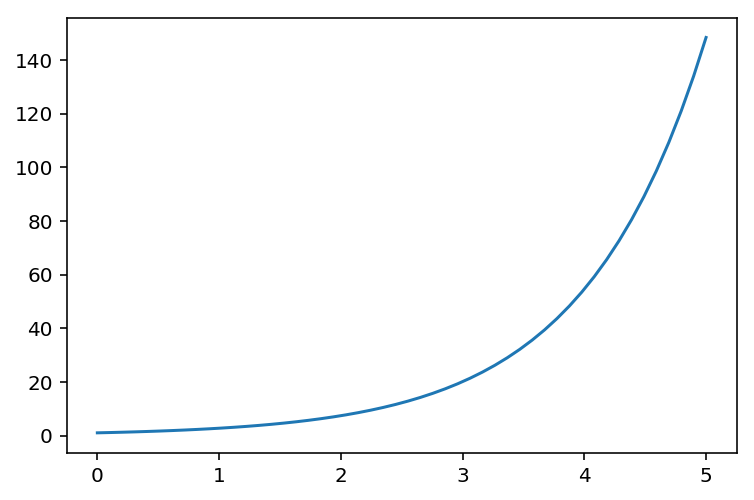

In [4]:
#funcion solucion
def solucion(x,a): # se define la funcion solucion(x,a), con variable (x,a)
    return exp(a*x) # regresa la funcion exponencial

tiempo = linspace(0,5) # se define tiempo como un linspace(inicio,final)
y = solucion(tiempo,1.) # se define "y" llamando a la funcion "solucion(x==tiempo,a==1)
plot(tiempo,y) # grafica (tiempo,y)
show() # muestra la grafica

#### Método de Euler

Para encontrar valores aproximados a una EDO con valor inicial:

\begin{array}{c} x'= f(t,x(t)) \\ \textrm{ con }\;\; x(a)=a \end{array}

en el intervalo $[a,b]$, se utilizan los dos primeros términos de la serie de Taylor

$$ x(t+h)\approx x(t) + h x'(t)$$

Por lo tanto se tiene que

$$x(t+h) = x(t) + h f(t,x(t))$$

Se pueden hacer $n$ pasos para ir de $t=a$ a $t=b$, es decir, $h=(b-a)/n$. Con ello el algoritmo quedaría:

$$x_{n+1} = x_n + h f(t_n,x_n) $$

donde $t_{n+1}=t_n +h$. En las siguientes dos funciones se programa la ecuación diferencial a resolver y el método de Euler. En el *notebook* [Método de Euler](http://nbviewer.jupyter.org/url/sistemas.fciencias.unam.mx/%7Erich/Herramientas/notebooks/Euler.ipynb) de las herramientas se pueden encontrar ejemplos ilustrativos del método de Euler y de cómo programarlo. Por lo pronto en este *notebook* únicamente se explica el algoritmo anterior con los comentarios expuestos en el código.

> El algoritmo que se presenta a continuación no es el más eficiente y para ello se recomienda ver el *notebook* [Método de Euler](http://nbviewer.jupyter.org/url/sistemas.fciencias.unam.mx/%7Erich/Herramientas/notebooks/Euler.ipynb).

In [5]:
# metodo de euler

# se define la ec.dif a resolver
def ec_dif(y,t,a): # se define la ec.dif con variables (y,t,a)
    return a*y # regresa el producto a*y

# se define el metodo de euler
def euler(x_inicio,t_inicial,t_final,delta_t,mi_funcion,parametro):# se define como una funcion
    x0 = x_inicio # condicion inicial 
    t0 = t_inicial # tiempo inicial
    dt = delta_t # tamaño de paso    
    t = t0 # se asigna a la variable t el valor inicial t0
    x = x0 # se asigna a la variable x el valor inicial 
    time=[] # se define como lista vacia
    sol=[] # se define como lista vacia
    # Proceso de iteracion para x y t
    while (t < t_final): # ciclo while con la condicion para t 
        time.append(t) # se agregan lo valore t a la lista time
        sol.append(x)# se agregan los valores de x a la lista sol
        x = x + (dt*mi_funcion(x,t,parametro)) # nuevo valor que depende del anterior
        t = t + dt # se asigna un nuevo valor que depende del anterior 
        # Se regresa como solucion en dos listas el tiempo y la solucion numerica
    return [time,sol]

A continuación se aplica la función ```euler``` ya definida para aplicarla a casos particulares.
 
> Nota. En el tercer reglón se grafican las variables que están dentro de los corchetes cuadrados (el ```[0]``` y ```[1]``` que se encuentran al final de ```y_euler_1``` y ```y_euler_05```), las cuales  seleccionan la solución de salida de la función de ```euler```  que son el ```tiempo``` y ```solución```. Ambas son el ```return``` de la función definida. Por otro lado la curva azul es la curva analítica, mientras que las otras dos son curvas aproximadas, la curva roja se aproxima mejor debido a que el tamaño de paso es más fino ```h=0.05```.

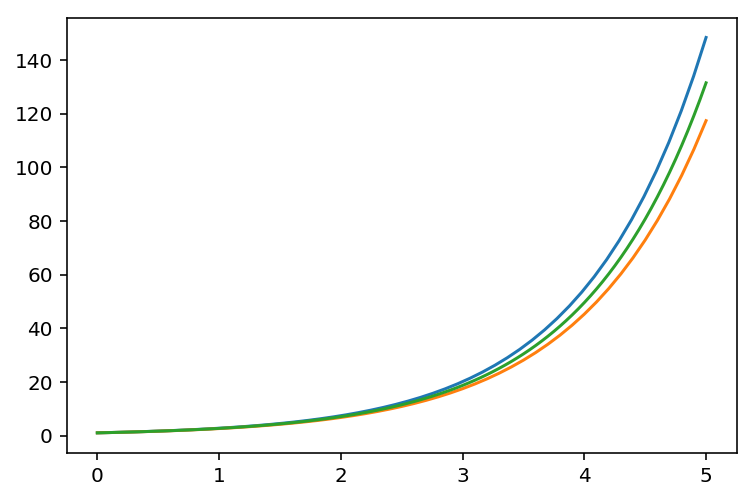

In [6]:
y_euler_1 = euler(1.,0.,5.,0.1,ec_dif,1.) # se define y_1 como la func euler  
y_euler_05 = euler(1.,0.,5.,0.05,ec_dif,1.) # se define y_2 como la func euler  
plot(tiempo,y,y_euler_1[0],y_euler_1[1],y_euler_05[0],y_euler_05[1]) # grafica las variables y soluciones
show() # muestra la grafica

En el *notebook* sobre el [Método de Runge-Kutta](http://nbviewer.jupyter.org/url/sistemas.fciencias.unam.mx/%7Erich/Herramientas/notebooks/Runge_Kutta.ipynb) se encuentra un algoritmo más eficiente que el del método de Euler, ya que tiene una convergencia más rápida para los mismos valores del paso ```h```.

#### Odeint

Una limitación del método de Euler es que el tamaño de paso de cada iteración es constante y su convergencia es lenta. Esto hace que dependiendo del problema, habrá veces en que la estimación numérica sea más difícil que en otras. La solución ideal a este tipo de problemas consiste en ajustar el tamaño de paso conforme se avanza en cada iteración del programa, este tipo de métodos se conocen como *adaptativos*. La librería **Scipy** tiene este tipo de métodos, por lo que un problema puede ser resuelto mediante una integración numérica más sofisticada.
La función ```odeint``` en el módulo ```scipy.integrate``` tiene una sencilla interface para llevar a cabo la integración.
 
Típicamente la forma de llamar a la función [odeint](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) es:

```python 
odeint( ec_diferencial , condicion_inicial , intervalo_de_integracion)
```

donde
* ```ec_diferencial```  es la ecuación a integrar.
* ```condicion_inicial``` es la condición inicial que puede ser un array.
* ```intervalo_de_integración``` es el conjunto de tiempos sobre los cuales se quiere la solución.

Cabe señalar que si se necesita pasar un argumento la ecuación diferencial, ```odeint``` tiene un parámetro opcional para hacerlo. Para ello se puede poner como argumento extra a la variable ```args``` con los parámetros que se deben pasar a la ecuación diferencial. Ésta debe tener los argumentos con forma de una lista tipo ```tuple```. En el caso de la ecuación diferencial anterior pondremos ```args=(1.,)``` para que ```odeint``` utilice la función ```ec_dif``` con el valor de ```a=1.```.

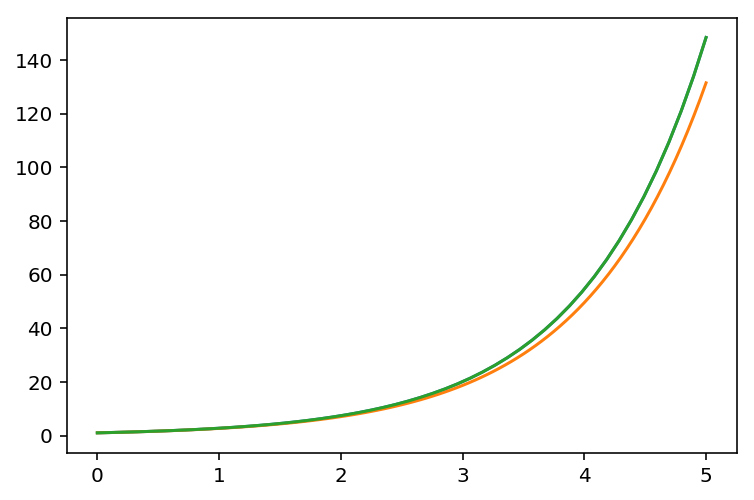

In [7]:
y_odeint = odeint(ec_dif,1.,tiempo,args=(1.,)) # se define la utilizacion de odeint()
plot(tiempo,y,y_euler_05[0],y_euler_05[1],tiempo,y_odeint) # hacer grafica
show() # muestra la grafica

> Note que el integrador de ```odeint``` no necesita de un paso debido a que su algoritmo ajusta el paso para que en los puntos que mandamos en el ```intervalo_de_integración``` tengan la precisión necesaria. 

A continuación se muestra una ejemplo sobre como resolver una ecuación diferencial de mayor orden cuando ésta se ve como un sistema de ecuaciones diferenciales.

## Sistemas de ecuaciones diferenciales

Un sistema de ecuaciones diferenciales lo podemos expresar de la siguiente manera:

$\frac{d \vec{u}}{dt}= \vec{F}(\vec{u},t)$

y los métodos de integración de los párrafos anteriores en una variable se pueden hacer extensivos a estas ecuaciones. También si tenemos una ecuación diferencial de orden superior la podemos expresar como un sistema de ecuaciones diferenciales de dimensión igual al orden de la ecuación diferencial original. Por ejemplo, supongamos que tenemos la ecuación diferencial $ y’’ + y = 0$. Ésta se puede expresar como un sistema de ecuaciones diferenciales si se hace el cambio de variable $ y’ = u $. De esta manera el sistema de ecuaciones diferenciales de primer orden es: 

$$ y’ = u $$
$$ u’ = -y $$

donde las variables a integrar son $ (y,u) $. Note que se las variables dependen implícitamente del tiempo y al momento de hacer la integración obtenemos $y(t)$ y $u(t)=y'(t)$. El sistema anterior de ecuaciones se puede programar de la siguiente manera:

In [8]:
#sistema de ecuaciones, ejemplo1
def ec2(y,t): # se define ec2(),como una funcion que depende de (y,t)
    return array([y[1],-y[0]]) # regresa un vector, mediante un array, 

De esta manera podemos utilizar ```odeint``` para hacer la integración numérica de la ecuación diferencial. Con ellos,  obtenemos $y(t)$ y $y'(t)$ como salida del integrador. En la gráfica de abajo se muestra una comparación entre la solución numérica con la analítica.

> Nota 1: La salida del integrador es una variable en la que se encuentra la solución en forma de ```array```. Para obtener $y(t)$ hay que seleccionar todos los valores en la columna 0, y para ello se utiliza ```[:,0]```. En el caso de $y'(t)$ hay que seleccionar todos los valores en la columna 1 utilizando ```[:,1]```.

> Nota 2: En este punto del *notebook* introducimos una manera eficiente y correcta de hacer gráficas. Esta forma de hacer gráficas proporciona un mejor control sobre cada elemento de la gráfica. Se recomienda que los usuarios visiten la página de [Matplotlib](https://matplotlib.org/) para ver más ejemplos y la documentación completa sobre los comandos y atributos que se pueden utilizar para hacer gráficas.

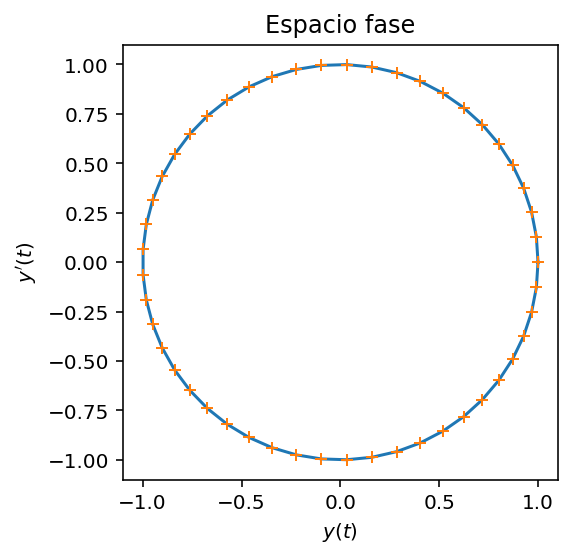

In [9]:
# solucion a la de un sistema de ecuaciones
tiempo = linspace(0,2*pi) # se define tiempo mediante un linspace
solucion = odeint(ec2,[1.,0.],tiempo)# se define solucion mediante un odeint()
grafica,ejes = subplots()
ejes.plot(solucion[:,0],solucion[:,1]) # grafica (y, dy/dt)
ejes.plot(cos(tiempo),sin(tiempo),'+') # solucion analitica
ejes.set( title="Espacio fase" , xlabel="$y(t)$" , ylabel="$y'(t)$",aspect='equal',xlim=[-1.1,1.1],ylim=[-1.1,1.1] )
show()

A continuación presentamos otro ejemplo en el que se resuelve la ecuación $y'' + \tfrac{1}{10}y'+\sin(y)=0$ que representa el péndulo amortiguado. En este caso, haciendo el mismo cambio de variable que en caso anterior, el sistema de ecuaciones es:

$$ y' = u$$
$$ u' = -\tfrac{1}{10}y' - \sin(y)$$

Este sistema de ecuaciones se puede programar con la siguiente función:

In [10]:
#sistema de ecuaciones, ejemplo2
def ec3(y,t):# se define ec3(),como una funcion que depende de (y,t)
    return array( [ y[1],-0.1*y[1] - sin(y[0]) ] ) #  #regresa un vector, mediane un array

Para ilustrar las soluciones del anterior sistema de ecuaciones diferenciales utilizaremos las condiciones iniciales:

a. $(y_1(0),u_1(0)) = (2,1)$

b. $(y_2(0),u_2(0)) = (0.9,0.5)$.

En la gráfica de abajo se muestra como conforme pasa el tiempo las trayectorias en el espacio fase van decayendo al centro en forma de espiral.

> Note que aunque la ecuación diferencial es no lineal se puede encontrar la solución.

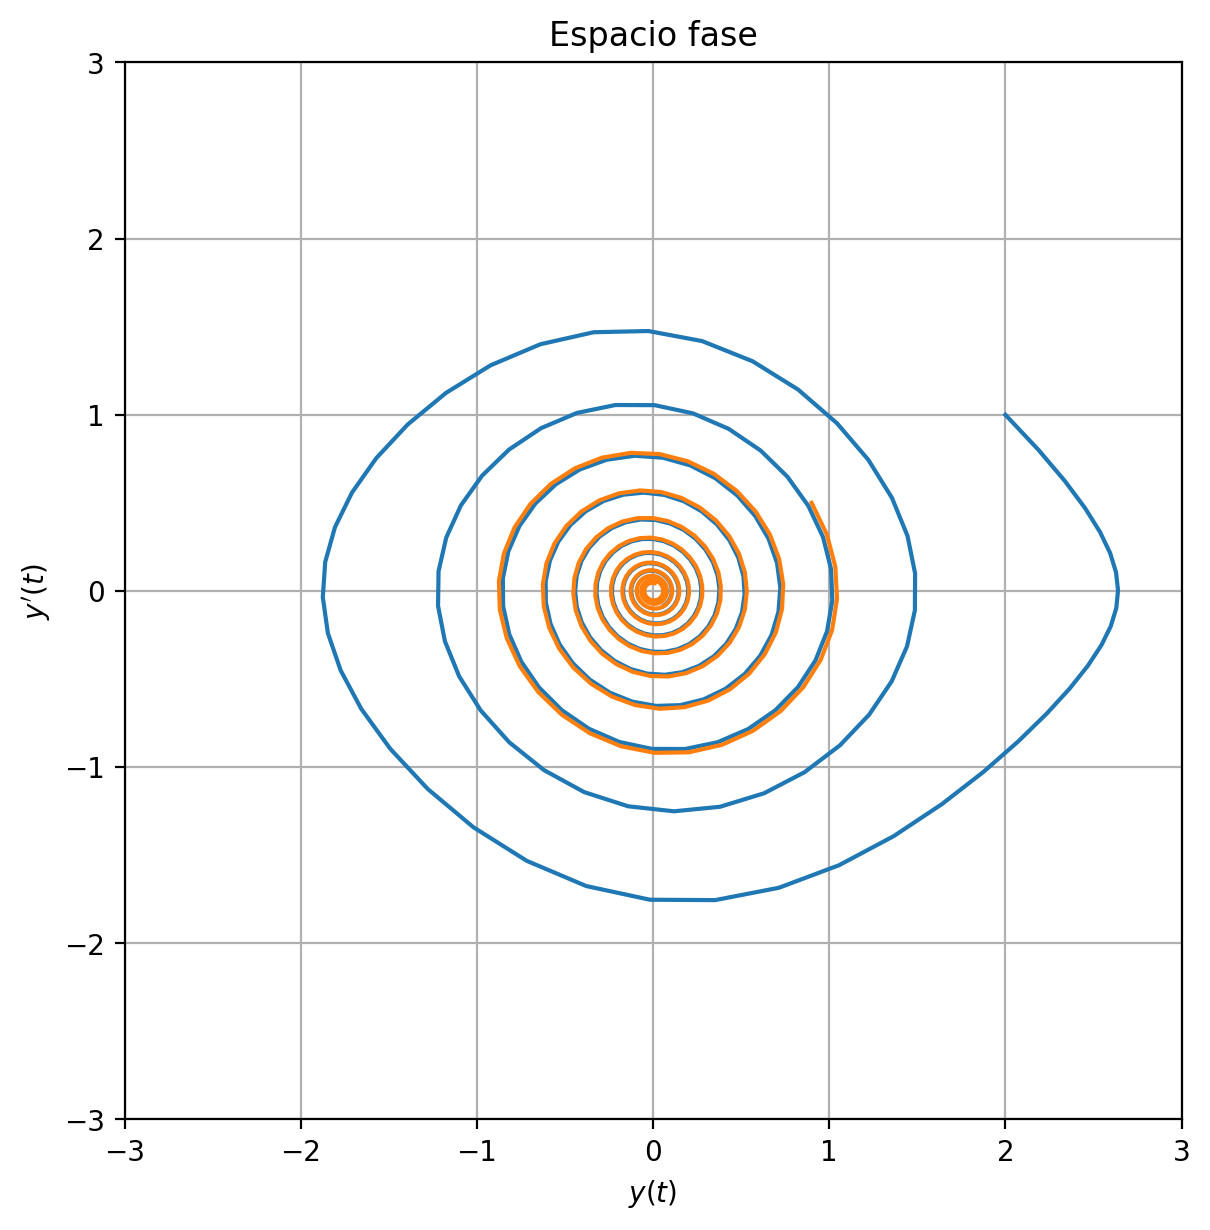

In [11]:
#solucion a la ec3
tiempo = linspace(0,20*pi,300) # se define tiempo mediante un linspace
y1 = odeint(ec3,[2.,1.],tiempo) # se define solucion y mediante un odeint()
y2 = odeint(ec3,[0.9,.5],tiempo) # se define solucion y2 mediante un odeint()
grafica,ejes = subplots(figsize=(7,7), dpi=100)
ejes.plot(y1[:,0],y1[:,1],y2[:,0],y2[:,1]) # grafica las componentes de y y y2
ejes.set(title="Espacio fase",xlabel="$y(t)$",ylabel="$y'(t)$",xlim=[-3,3],ylim=[-3,3],aspect='equal')
ejes.grid(True)
show()

A continuación mostramos la solución en el plano $ (t,y(t)) $ para las dos condiciones iniciales anteriores.

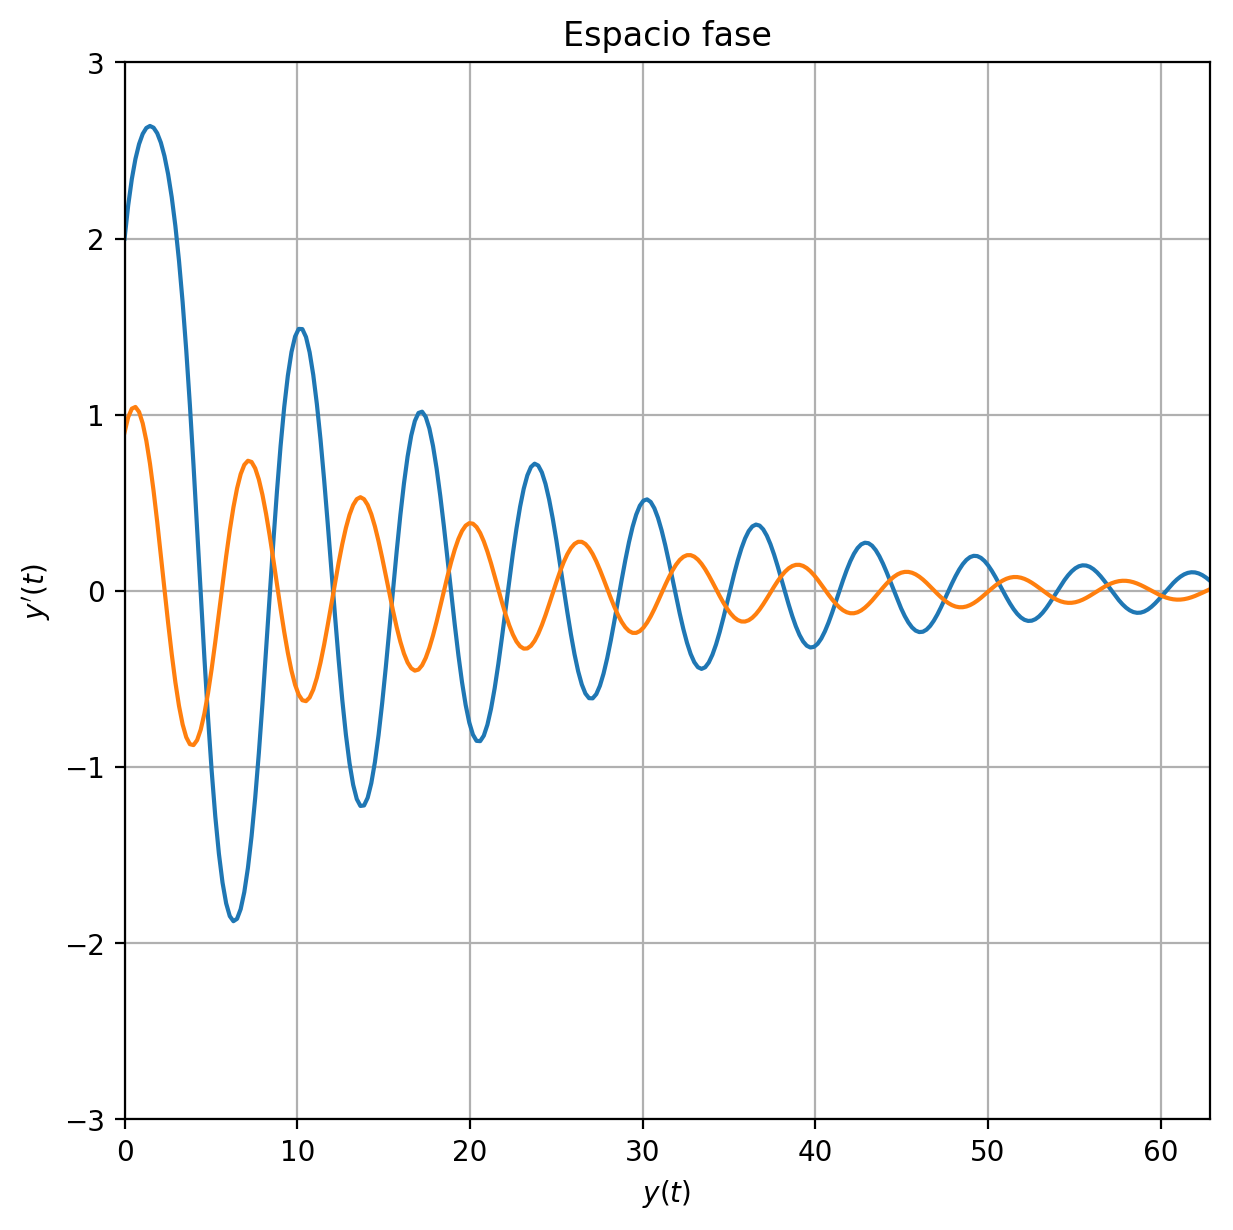

In [12]:
grafica,ejes = subplots(figsize=(7,7), dpi=100)
ejes.plot(tiempo,y1[:,0],tiempo,y2[:,0]) # grafica lo que esta entre paréntesis
ejes.set(title="Espacio fase",xlabel="$y(t)$")
ejes.set(ylabel="$y'(t)$",xlim=[0,max(tiempo)],ylim=[-3,3])
ejes.grid(True)
show()

Hasta el momento en los *notebook's* se han mostrado algunos aspectos básicos que se requieren para la programación básica en *python* en los siguientes notebook's se realizan algunos ejemplos ilustrativos de todo lo expuesto hasta el momento. En la página de [herramientas.](http://sistemas.fciencias.unam.mx/~rich/Herramientas/index.html) se encuentra una sección se ejemplos ilustrativos que resuelven y/o explican ejemplos más concretos. Invitamos al usuario a consultarlos para continuar aprendiendo.

[Regresar a las herramientas.](http://sistemas.fciencias.unam.mx/~rich/Herramientas/index.html)

Se agradece el apoyo de los proyectos DGAPA-PAPIME:

+ PE 112919 durante el año 2020. *Mantenimiento general, esta es la última actualización de este tutorial y se recomienda usar el correspondiente a Python 3*. Versión 3

+ PE 105017 durante el año 2017. *Versión 2*

+ PE 108216 durante el año 2016. *Mantenimiento mayor*

+ PE 106615 durante el año 2015. *Idea original*